In [ ]:
import os

# Giriş dosyasının yolu ve adı (yeni_dosya.txt)
input_file_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/yeni_dosya.txt"
# Sıralı isim listesinin yolu ve adı
name_list_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out_fits_ismi_sırası.txt"
# Çıkış dizininin yolu
output_directory = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/yeni/"

# Dosyayı oku
with open(name_list_path, 'r') as name_list_file:
    name_list = name_list_file.readlines()

# Dosyaları oku
with open(input_file_path, 'r') as input_file:
    lines = input_file.readlines()

# Çıkış dizini kontrolü ve oluşturma
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Her 166 satırda bir dosya oluştur ve içine yaz
for i in range(0, len(lines), 166):
    output_file_name = name_list[i//166].strip() + ".txt"
    output_file_path = os.path.join(output_directory, output_file_name)
    with open(output_file_path, 'w') as output_file:
        output_file.writelines(lines[i:i+166])

print("İşlem tamamlandı. Dosyalar belirtilen dizine ve sıraya göre kaydedildi.")

In [ ]:
import os

def devrik_donustur(txt_dosya_yolu, cikti_dosya_yolu):
    try:
        with open(txt_dosya_yolu, 'r') as giris_dosyasi:
            satirlar = giris_dosyasi.readlines()
            
            # Veriyi devrik hale getir
            devrik_veri = list(map(lambda x: x.split(), satirlar))
            devrik_veri = list(zip(*devrik_veri))
            
            # Yeni dosyaya yaz
            with open(cikti_dosya_yolu, 'w') as cikti_dosyasi:
                for satir in devrik_veri:
                    cikti_dosyasi.write('\t'.join(satir) + '\n')
                
            print(f"{txt_dosya_yolu} dosyası devrik olarak {cikti_dosya_yolu} dosyasına dönüştürüldü.")
            
    except FileNotFoundError:
        print(f"Hata: {txt_dosya_yolu} bulunamadı.")

# Dosyaların bulunduğu klasör
klasor_yolu = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/yeni/'

# Klasördeki her txt dosyasını işle
for dosya_adı in os.listdir(klasor_yolu):
    if dosya_adı.endswith(".txt"):
        dosya_yolu = os.path.join(klasor_yolu, dosya_adı)
        cikti_dosya_yolu = os.path.join(klasor_yolu, f"devrik_{dosya_adı}")
        devrik_donustur(dosya_yolu, cikti_dosya_yolu)

In [ ]:
with open('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/yeni/2dF_Mar2007_PNG354.94-02.86F_id3152.fits_lines.txt', 'r', encoding='utf-8') as dosya:
    satir_sayisi = 0
    sütun_sayisi = 0

    for satir in dosya:
        veri = satir.strip().split('\t')  # Tab karakteri ile ayır
        sütun_sayisi = max(sütun_sayisi, len(veri))
        satir_sayisi += 1

print(f"Dosyadaki satır sayısı: {satir_sayisi}")
print(f"Dosyadaki sütun sayısı: {sütun_sayisi}")

In [ ]:
############ kod çakılıyor çalışıyo çalışıyo bitmiyor ###################
import os
import pandas as pd

# Klasör yolunu güncelleyin
klasor_yolu = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/yeni/'

# Boş bir DataFrame oluşturun
df = pd.DataFrame()

# Klasördeki her txt dosyasını işleyin
for dosya_adı in os.listdir(klasor_yolu):
    if dosya_adı.endswith('.txt'):
        dosya_yolu = os.path.join(klasor_yolu, dosya_adı)

        # Dosyayı okuyun
        with open(dosya_yolu, 'r') as dosya:
            satirlar = dosya.readlines()

        # Sütun başlıklarını belirleyin
        sütun_basliklari = [satir.strip() for satir in satirlar[:166]]

        # Verileri alın
        veri = [satirlar[i:i+166] for i in range(166, len(satirlar), 166)]

        # DataFrame'e ekleyin
        df_dosya = pd.DataFrame(veri, columns=sütun_basliklari)
        df_dosya.insert(0, 'Dosya İsmi', dosya_adı)  # Dosya ismini ekleyin
        df = pd.concat([df, df_dosya], ignore_index=True)

# Excel dosyasına yazın
excel_yolu = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sonuc.xlsx'
df.to_excel(excel_yolu, index=False)

print(f"Excel dosyası oluşturuldu: {excel_yolu}")

In [ ]:
from astropy.io import fits
import pandas as pd
import os

def fits_veri_cikart(fits_dizin, cikti_dosya):
    # Boş bir DataFrame oluştur
    dataframe = pd.DataFrame()

    # FITS dosyalarını oku
    for fits_dosya in os.listdir(fits_dizin):
        if fits_dosya.endswith(".fits"):
            fits_yol = os.path.join(fits_dizin, fits_dosya)

            # FITS dosyasını aç
            with fits.open(fits_yol) as hdu_list:
                # RESULTS verisini al
                results_verisi = hdu_list[2].data

                # Her bir seti DataFrame'e ekle
                for i in range(4):
                    sira_numarasi = i + 0
                    set_adı = f"Seri_{sira_numarasi}"
                    set_verisi = results_verisi[i]["Value"]   # Burada "col2" sütun adını değiştirebilirsiniz

                    dataframe[f"{fits_dosya}"] = set_verisi

    # CSV dosyasına yaz
    dataframe.to_csv(cikti_dosya, index=False)

fits_dizin = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/"
cikti_dosya = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sonuc_dosyasi.csv"

fits_veri_cikart(fits_dizin, cikti_dosya)


In [ ]:
from astropy.io import fits

fits_dosya = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/2dF_Jun2014_PN_G000.3-01.6B_2D180614_id2066.fits_lines.fits"

with fits.open(fits_dosya) as hdu_list:
    results_sutun_adlari = hdu_list[2].data.columns.names

print(results_sutun_adlari)


In [ ]:
from astropy.io import fits

# FITS dosyasını aç
fits_file_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/2dF_Jun2014_PN_G000.3-01.6B_2D180614_id2066.fits_lines.fits"
hdulist = fits.open(fits_file_path)

# RESULTS HDU'nun kartlarını göster
results_hdu = hdulist[2]  # RESULTS HDU'nun indeksi 2
header_cards = results_hdu.header

# Her bir kartı yazdır
for card in header_cards:
    print(card)

# FITS dosyasını kapat
hdulist.close()


In [ ]:
# import os
from astropy.io import fits
import matplotlib.pyplot as plt

# FITS dosyalarının bulunduğu dizin
directory = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/"

# Dizindeki tüm FITS dosyalarını al
fits_files = [f for f in os.listdir(directory) if f.endswith(".fits")]

# Değerleri saklamak için boş bir liste oluştur
non_zero_values = []

# Her bir FITS dosyası için işlem yap
for fits_file in fits_files:
    fits_path = os.path.join(directory, fits_file)
    
    # FITS dosyasını aç
    hdulist = fits.open(fits_path)
    
    # İlgili HDU'yu seç (örneğin, PRIMARY HDU ise indeks 0)
    hdu = hdulist[2]
    
    # 1. satırın 2. sütundaki değeri al ve sıfırdan farklı ise listeye ekle
    value = hdu.data[][1]
    if value != 0:
        non_zero_values.append(value)
    
    # FITS dosyasını kapat
    hdulist.close()

# Histogramı çiz
plt.hist(non_zero_values, bins=20, color='blue', edgecolor='black')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.title('Histogram - Sıfırdan Farklı 1. Satır, 2. Sütun Değerleri')
plt.show()

In [ ]:
# import os
from astropy.io import fits
import matplotlib.pyplot as plt

# FITS dosyalarının bulunduğu dizin
directory = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/"

# Dizindeki tüm FITS dosyalarını al
fits_files = [f for f in os.listdir(directory) if f.endswith(".fits")]

# Değerleri saklamak için boş bir liste oluştur
non_zero_values = []

# Her bir FITS dosyası için işlem yap
for fits_file in fits_files:
    fits_path = os.path.join(directory, fits_file)
    
    # FITS dosyasını aç
    hdulist = fits.open(fits_path)
    
    # İlgili HDU'yu seç (örneğin, PRIMARY HDU ise indeks 0)
    hdu = hdulist[1]
    
    # 1. satırın 2. sütundaki değeri al ve sıfırdan farklı ise listeye ekle
    value = hdu.data[1][2]
    if value != 0:
        non_zero_values.append(value)
    
    # FITS dosyasını kapat
    hdulist.close()

# Histogramı çiz
plt.hist(non_zero_values, bins=20, color='blue', edgecolor='black')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.title('Histogram - Sıfırdan Farklı 1. Satır, 2. Sütun Değerleri')
plt.show()

In [ ]:
dosya_yolu = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_flux_out/2dF_Mar2007_PNG354.94-02.86F_id3152.fits_lines.txt'

# Dosyayı oku
with open(dosya_yolu, 'r') as dosya:
    dosya_icerigi = dosya.readlines()

# [ ] ifadelerini sil ve satırları liste yapısına dönüştür
veriler = [eval(line.strip('[]')) for line in dosya_icerigi]

# Satır sayısını ve sütun sayısını belirle
satir_sayisi = len(veriler)
sutun_sayisi = len(veriler[0])

print(f"Dosya {satir_sayisi} satır ve {sutun_sayisi} sütundan oluşuyor.")

In [ ]:
from astropy.io import fits

# Specify the path to your FITS file
fits_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/2dF_Jun2014_PN_G000.3-01.6B_2D180614_id2066.fits_lines.fits'

# Örnek olarak, aradığınız değeri belirtin (bu değeri ihtiyacınıza göre değiştirin)
search_value_in_second_column = 4861.33  # Örnek bir değer

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # Access the "LINES" HDU data
    lines_data = hdul['LINES'].data

    # İkinci sütundaki belirli bir değeri içeren satırın indeksini bulun
    index_of_row = None
    for i, value in enumerate(lines_data['WlenRest']):
        if value == search_value_in_second_column:
            index_of_row = i
            break

    # İkinci sütundaki belirli bir değeri içeren satır bulundu mu kontrol edin
    if index_of_row is not None:
        # İkinci sütundaki belirli bir değeri içeren satırın 3. sütundaki veriyi alın
        desired_value_in_third_column = lines_data['Flux'][index_of_row]

        # Sonucu yazdırın
        print(f"Desired Value in Third Column: {desired_value_in_third_column}")
    else:
        print(f"Search value not found in the second column.")


In [ ]:
from astropy.io import fits

# Specify the path to your FITS file
fits_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/2dF_Jun2014_PN_G000.3-01.6B_2D180614_id2066.fits_lines.fits'

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # Access the "LINES" HDU data
    lines_data = hdul['LINES'].data

    # Print the entire data
    print(lines_data[:5])

In [ ]:
print(lines_data[:5]['WlenObserved', 'Flux', 'Ion'])

In [ ]:
with open('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_flux_out/2dF_Mar2007_PNG354.94-02.86F_id3152.fits_lines.txt', 'r') as file:
    lines = file.readlines()

cleaned_lines = []

for line in lines:
    # [ ] parantezlerini kaldır
    line = line.strip('[]')
    
    # ( ) parantezlerini kaldır
    line = line.replace('(', '').replace(')', '')
    
    # Virgülü silerek sütunlara ayır
    columns = line.split(',')
    
    # Her sütundaki boşlukları sil
    columns = [column.strip() for column in columns]
    
    # Temizlenmiş satırı yeni listeye ekle
    cleaned_lines.append(columns)

# Temizlenmiş verileri yeni bir dosyaya yaz
with open('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/deneme.txt', 'w') as file:
    for line in cleaned_lines:
        file.write(','.join(line) + '\n')

In [ ]:
from astropy.io import fits
import numpy as np

# FITS dosyasını aç
fits_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/adsız/2dF_Jun2014_PN_G000.3-01.6B_2D180614_id2066.fits_lines.fits'
hdul = fits.open(fits_file_path)

# hdul1 içindeki data kısmını numpy array olarak al
data = np.array(hdul[1].data)

# Yeni bir düzenleme yapmak için bir döngü oluştur
cleaned_data = []

for row in data:
    # Her satırdaki verileri ( ) parantezleri içinde virgül ile ayır
    row_str = ', '.join(map(str, row))
    
    # Satırın başına ve sonuna [ ] parantezleri ekleyerek temizlenmiş satırı oluştur
    cleaned_row = f'[{row_str}]'
    
    # Temizlenmiş satırı yeni listeye ekle
    cleaned_data.append(cleaned_row)

# Temizlenmiş verileri yeni bir dosyaya yaz
output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/adsız/klasör/deneme.txt'
with open(output_file_path, 'w') as output_file:
    for row in cleaned_data:
        output_file.write(row + '\n')

# FITS dosyasını kapat
hdul.close()


In [ ]:
from astropy.io import fits
import numpy as np

# FITS dosyasını aç
fits_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/adsız/2dF_Jun2014_PN_G000.3-01.6B_2D180614_id2066.fits_lines.fits'
hdul = fits.open(fits_file_path)

# hdul1 içindeki data kısmını numpy array olarak al
data = np.array(hdul[1].data)

# Yeni bir düzenleme yapmak için bir döngü oluştur
cleaned_data = []

for row in data:
    # Her satırdaki verileri ( ) parantezleri içinde virgül ile ayır
    row_str = ', '.join(map(str, row))
    
    # Satırı [ ] parantezleri içine al
    cleaned_row = f'[{row_str}]'
    
    # Temizlenmiş satırı yeni listeye ekle
    cleaned_data.append(cleaned_row)

# Temizlenmiş verileri yeni bir dosyaya yaz
output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/adsız/klasör/deneme.txt'
with open(output_file_path, 'w') as output_file:
    for row in cleaned_data:
        output_file.write(row + '\n')

# FITS dosyasını kapat
hdul.close()


In [ ]:
from astropy.io import fits
import numpy as np

# FITS dosyasını aç
fits_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/adsız/2dF_Jun2014_PN_G000.3-01.6B_2D180614_id2066.fits_lines.fits'
hdul = fits.open(fits_file_path)

# hdul1 içindeki data kısmını numpy array olarak al
data = np.array(hdul[1].data)

# Yeni bir düzenleme yapmak için bir döngü oluştur
cleaned_data = []

for i, row in enumerate(data):
    # Her satırdaki verileri ( ) parantezleri içinde virgül ile ayır
    row_str = ', '.join(map(str, row))
    
    # Satırı [ ] parantezleri içine al
    cleaned_row = f'[{row_str}]'
    
    # Temizlenmiş satırı yeni listeye ekle
    cleaned_data.append(cleaned_row)

    # 3. satırdaki 3. sütundaki değeri yazdır
    if i == 2:  # 3. satır, Python'da indeksler 0'dan başlar, bu yüzden 2'yi kontrol ediyoruz
        third_column_value = row[2]
        print(f'3. satır, 3. sütun değeri: {third_column_value}')

# Temizlenmiş verileri yeni bir dosyaya yaz
output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/adsız/klasör/deneme.txt'
with open(output_file_path, 'w') as output_file:
    for row in cleaned_data:
        output_file.write(row + '\n')

# FITS dosyasını kapat
hdul.close()

In [ ]:
########## belli dalga boylarındaki değelerin akılarını bulma ########


from astropy.io import fits
import numpy as np
import os

# FITS dosyalarının bulunduğu dizini belirtin
fits_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/'

# FITS dizinindeki tüm dosyaları işleyin
fits_files = [f for f in os.listdir(fits_directory) if f.endswith('.fits')]

# 2. sütundan aranacak değerleri belirtin
aranan_degerler = [4861.33, 5006.84, 6548.1, 6562.77, 6583.5, 6716.44, 6730.82]

for fits_file_name in fits_files:
    # FITS dosyasını aç
    fits_file_path = os.path.join(fits_directory, fits_file_name)
    hdul = fits.open(fits_file_path)

    # hdul1 içindeki data kısmını numpy array olarak al
    data = np.array(hdul[1].data)

    # İlgili değerleri ara
    for deger in aranan_degerler:
        found = False
        for row in data:
            if np.isclose(row[1], deger, atol=1e-2):  # Nümerik hata toleransı
                ucuncu_sutun_degeri = row[2]
                print(f"{fits_file_name}: λ: {deger}, F: {ucuncu_sutun_degeri}")
                found = True
                break  # İlk eşleşmeyi bulduktan sonra döngüyü sonlandır

        if not found:
            print(f"{fits_file_name}: λ: {deger} , F: - ")

    # FITS dosyasını kapat
    hdul.close()

In [ ]:
########## belli dalga boylarındaki değelerin akılarını bulma ve tablolaştırma ########


from astropy.io import fits
import numpy as np
import os
import pandas as pd

# FITS dosyalarının bulunduğu dizini belirtin
fits_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/'

# FITS dizinindeki tüm dosyaları işleyin
fits_files = [f for f in os.listdir(fits_directory) if f.endswith('.fits')]

# 2. sütundan aranacak değerleri belirtin
aranan_degerler = [4861.33, 5006.84, 6548.1, 6562.77, 6583.5, 6716.44, 6730.82]

# Boş bir DataFrame oluştur
df = pd.DataFrame(columns=["Dosya İsmi"] + [f"λ: {deger}" for deger in aranan_degerler])

for fits_file_name in fits_files:
    # FITS dosyasını aç
    fits_file_path = os.path.join(fits_directory, fits_file_name)
    hdul = fits.open(fits_file_path)

    # hdul1 içindeki data kısmını numpy array olarak al
    data = np.array(hdul[1].data)

    # İlgili değerleri ara
    row_data = {"Dosya İsmi": fits_file_name}
    for deger in aranan_degerler:
        found = False
        for row in data:
            if np.isclose(row[1], deger, atol=1e-2):  # Nümerik hata toleransı
                ucuncu_sutun_degeri = row[2]
                row_data[f"λ: {deger}"] = ucuncu_sutun_degeri
                found = True
                break  # İlk eşleşmeyi bulduktan sonra döngüyü sonlandır

        if not found:
            row_data[f"λ: {deger}"] = -1

    # DataFrame'e satır ekle
    df = pd.concat([df, pd.DataFrame([row_data])], ignore_index=True)

    # FITS dosyasını kapat
    hdul.close()

# DataFrame'i ekrana yazdır
print(df)


In [ ]:
from astropy.io import fits
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# FITS dosyalarının bulunduğu dizini belirtin
fits_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/neat_out/'

# FITS dizinindeki tüm dosyaları işleyin
fits_files = [f for f in os.listdir(fits_directory) if f.endswith('.fits')]

# 2. sütundan aranacak değerleri belirtin
aranan_degerler = [4861.33, 5006.84, 6548.1, 6562.77, 6583.5, 6716.44, 6730.82]

# Boş bir DataFrame oluştur
df = pd.DataFrame(columns=["Dosya İsmi"] + [f"λ: {deger}" for deger in aranan_degerler])

for fits_file_name in fits_files:
    # FITS dosyasını aç
    fits_file_path = os.path.join(fits_directory, fits_file_name)
    hdul = fits.open(fits_file_path)

    # hdul1 içindeki data kısmını numpy array olarak al
    data = np.array(hdul[1].data)

    # İlgili değerleri ara
    row_data = {"Dosya İsmi": fits_file_name}
    for deger in aranan_degerler:
        found = False
        for row in data:
            if np.isclose(row[1], deger, atol=1e-2):  # Nümerik hata toleransı
                ucuncu_sutun_degeri = row[2]
                row_data[f"λ: {deger}"] = ucuncu_sutun_degeri
                found = True
                break  # İlk eşleşmeyi bulduktan sonra döngüyü sonlandır

        if not found:
            row_data[f"λ: {deger}"] = np.nan  # Eğer değer yoksa NaN yap

    # DataFrame'e satır ekle
    df = pd.concat([df, pd.DataFrame([row_data])], ignore_index=True)

    # FITS dosyasını kapat
    hdul.close()

# Oranları hesapla ve hatalı verileri temizle
df["Oran1"] = np.where(df.iloc[:, 3].notna() & df.iloc[:, 2].notna() & df.iloc[:, 4].notna(),
                       np.log(df.iloc[:, 3] / (df.iloc[:, 2] + df.iloc[:, 4])), np.nan)
df["Oran2"] = np.where(df.iloc[:, 3].notna() & df.iloc[:, 5].notna() & df.iloc[:, 6].notna(),
                       np.log(df.iloc[:, 3] / (df.iloc[:, 5] + df.iloc[:, 6])), np.nan)
df["Oran3"] = np.where(df.iloc[:, 1].notna() & df.iloc[:, 0].notna(),
                       np.log(df.iloc[:, 1] / df.iloc[:, 0]), np.nan)
df["Oran4"] = np.where(df.iloc[:, 4].notna() & df.iloc[:, 3].notna(),
                       np.log(df.iloc[:, 4] / df.iloc[:, 3]), np.nan)
df["Oran5"] = np.where(df.iloc[:, 1].notna() & df.iloc[:, 0].notna(),
                       np.log(df.iloc[:, 1] / df.iloc[:, 0]), np.nan)
df["Oran6"] = np.where(df.iloc[:, 5].notna() & df.iloc[:, 6].notna() & df.iloc[:, 3].notna(),
                       np.log((df.iloc[:, 5] + df.iloc[:, 6]) / df.iloc[:, 3]), np.nan)

# NaN olan değerleri temizleme
df.dropna(subset=["Oran1", "Oran2", "Oran3", "Oran4", "Oran5", "Oran6"], inplace=True)

# Grafikleri oluştur
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Birinci grafik
axes[0].scatter(df["Oran2"], df["Oran1"])
axes[0].set_title("Birinci Grafik")
axes[0].set_xlabel("Oran2")
axes[0].set_ylabel("Oran1")
axes[0].set_xlim(-1.0, 2.5)
axes[0].set_ylim(-1.5, 2.0)

# İkinci grafik
axes[1].scatter(df["Oran4"], df["Oran3"])
axes[1].set_title("İkinci Grafik")
axes[1].set_xlabel("Oran4")
axes[1].set_ylabel("Oran3")
axes[1].set_xlim(-2.5, 1.0)
axes[1].set_ylim(-1.5, 2.0)

# Üçüncü grafik
axes[2].scatter(df["Oran6"], df["Oran5"])
axes[2].set_title("Üçüncü Grafik")
axes[2].set_xlabel("Oran6")
axes[2].set_ylabel("Oran5")
axes[2].set_xlim(-2.5, 1.0)
axes[2].set_ylim(-1.5, 2.0)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Excel dosyasını oku
dosya_yolu = '/Users/nurullah/Desktop/galaxy_abudance/08122023.xlsx'  # Dosya adını ve uzantısını güncelleyin
df = pd.read_excel(dosya_yolu, sheet_name='neat_result')

# [OIII] temperature sütununda 35000 değerine sahip satırları seç
filtre = df[' [OIII] temperature'] == 35000
secilen_satirlar = df[filtre]

# İlk sütunu al ve listeye çevir
sonuc_listesi = secilen_satirlar.iloc[:, 0].tolist()

# Sonucu yazdır
print(sonuc_listesi)

In [ ]:
import pandas as pd

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/Kitap1.xlsx'
df = pd.read_excel(excel_path, sheet_name='Sayfa1')

# 35000_name sütununu oluştur
df['35000_name_Resolution'] = df['35000_name'].map(df.set_index('Fits_name')['Resolution'])

# Sonucu başka bir Excel dosyasına yazabilirsiniz, örneğin:
output_excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'
df.to_excel(output_excel_path, index=False)

print(f"İşlem tamamlandı. Sonuçlar '{output_excel_path}' dosyasına yazıldı.")


In [ ]:
import os
from astropy.io import fits

def birlestir_ve_kaydet(ana_klasor, cikti_dosyasi):
    with fits.open(cikti_dosyasi, mode='append', memmap=True) as hdul_out:
        for root, dirs, files in os.walk(ana_klasor):
            for file in files:
                if file.endswith('.fits'):
                    dosya_yolu = os.path.join(root, file)
                    with fits.open(dosya_yolu, memmap=True) as hdul_in:
                        for hdu in hdul_in:
                            hdul_out.append(hdu)

    print(f'Tüm .fits dosyaları {cikti_dosyasi} adlı dosyaya birleştirildi.')

if __name__ == "__main__":
    ana_klasor = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/"  # Ana klasörünüzün yolunu belirtin
    cikti_dosyasi = "/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/"  # Çıktı dosyasının adını ve yolunu belirtin

    birlestir_ve_kaydet(ana_klasor, cikti_dosyasi)


In [ ]:
import os
import shutil

def klasorleri_birlestir(ana_klasor, hedef_klasor):
    if not os.path.exists(hedef_klasor):
        os.makedirs(hedef_klasor)

    for root, dirs, files in os.walk(ana_klasor):
        for file in files:
            if file.endswith('.fits'):
                dosya_yolu = os.path.join(root, file)
                shutil.copy2(dosya_yolu, hedef_klasor)

    print(f'Tüm .fits dosyaları {hedef_klasor} klasörüne kopyalandı.')

if __name__ == "__main__":
    ana_klasor = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/"  # Ana klasörünüzün yolunu belirtin
    cikti_dosyasi = "/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/"  # Çıktı dosyasının adını ve yolunu belirtin

    klasorleri_birlestir(ana_klasor, cikti_dosyasi)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='Sayfa4')

# Histogramları çizecek sütun adlarını seç
columns_to_plot = ['[O III] / Hβ', '[N II] / Hα', '[S II] / Hα']

# Histogramları çizecek sütunlardaki verileri al
hist_data = data[columns_to_plot]

# Her bir sütun için ayrı histogram çiz
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(hist_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    #plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Değer')
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='Sayfa4')

# Histogramları çizecek sütun adlarını seç
columns_to_plot = ['[O III] / Hβ', '[N II] / Hα', '[S II] / Hα']

# Histogramları çizecek sütunlardaki verileri al
hist_data = data[columns_to_plot]

# Kayıt konumu
save_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/rapor_görüntüler/'

# Her bir sütun için ayrı histogram çiz ve dosya olarak kaydet
for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 6))
    plt.hist(hist_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.grid(True)
    
    # Histogramı ayrı dosya olarak belirtilen konuma kaydet
    if i == 0:
        plt.title('[O III](4959+5007) / Hβ')
        plt.savefig(f"{save_path}OIII_.png", dpi=300)
    elif i == 1:
        plt.title('[N II](6548+6583) / Hα')
        plt.savefig(f"{save_path}NII_.png", dpi=300)
    elif i == 2:
        plt.title('[S II](6716+6731) / Hα')
        plt.savefig(f"{save_path}SII_.png", dpi=300)
    
    # Oluşturulan grafik nesnesini temizle
    plt.clf()

# Son olarak, tüm grafik pencerelerini kapat
plt.close('all')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='Sayfa4')

# Histogramları çizecek sütun adlarını seç
columns_to_plot = ['[O III] / Hβ', '[N II] / Hα', '[S II] / Hα']

# Histogramları çizecek sütunlardaki verileri al
hist_data = data[columns_to_plot]

# Kayıt konumu
save_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/rapor_görüntüler/'

# Her bir sütun için ayrı histogram çiz ve dosya olarak kaydet
for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 6))
    plt.hist(hist_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    #plt.xlabel(column)
    plt.ylabel(('Kaynak Sayısı'), fontsize=20)
    plt.grid(True)
    
    # Kırmızı çizgileri ekle
    if i == 0:
        plt.title('[O III](4959+5007) / Hβ', fontsize=20)
        plt.axvline(x=5, color='red', linestyle='--', linewidth=2)
        plt.legend()
        plt.savefig(f"{save_path}OIII_.png", dpi=300)
    elif i == 1:
        plt.title('[N II](6548+6583) / Hα', fontsize=20)
        plt.axvline(x=0.6, color='red', linestyle='--', linewidth=2)
        plt.legend()
        plt.savefig(f"{save_path}NII_.png", dpi=300)
    elif i == 2:
        plt.title('[S II](6716+6731) / Hα', fontsize=20)
        plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2)
        plt.legend()
        plt.savefig(f"{save_path}SII_.png", dpi=300)
    
    # Oluşturulan grafik nesnesini temizle
    plt.clf()

# Son olarak, tüm grafik pencerelerini kapat
plt.close('all')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='neat_result')

# Histogramları çizecek sütun adlarını seç
columns_to_plot = ['[OIII] Temperature', '[SII] Density', 'c(Hb) (Ha/Hb)']

# Filtreleme işlemi: [OIII] temperature sütunundan 35,000 değerinden küçük olanları al
filtered_data = data[
    (data['[OIII] Temperature'] != 35000) & (data['[OIII] Temperature'] != 0) &
    (data['[SII] Density'] != 0) & (data['[SII] Density'] != 100000) & 
    (data['c(Hb) (Ha/Hb)'] != 0)
]

# Histogramları çizecek sütunlardaki filtrelenmiş verileri al
hist_data = filtered_data[columns_to_plot]

# Kayıt konumu
save_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/rapor_görüntüler/'

# Her bir sütun için ayrı histogram çiz ve dosya olarak kaydet
for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 6))
    plt.hist(hist_data[column].dropna(), bins=50, color='skyblue', edgecolor='black')
    #plt.xlabel(column)
    plt.ylabel(('Kaynak Sayısı'), fontsize=20)
    plt.grid(True)
    
    # Histogramı ayrı dosya olarak belirtilen konuma kaydet
    if i == 0:
        plt.title((r'$[O \, III] \, \text{Temperature}$'), fontsize=20)
        plt.savefig(f"{save_path}Te.png", dpi=300)
    elif i == 1:
        plt.title((r'$[S \, II] \, \text{Density}$'), fontsize=20)
        plt.savefig(f"{save_path}Ne.png", dpi=300)
    elif i == 2:
        plt.title((r'$c(H\beta)$'), fontsize=20)
        plt.savefig(f"{save_path}c(Hb).png", dpi=300)
    
    # Oluşturulan grafik nesnesini temizle
    #plt.close()
    plt.show()
# Tüm grafik pencerelerini kapat
#plt.close('all')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='neat_result')

# Histogramları çizecek sütun adlarını seç
columns_to_plot = ['O2+/H', 'S+/H', 'N+/H', 'Ar2+/H']

# Filtreleme işlemi: [OIII] temperature sütunundan 35,000 değerinden küçük olanları al
filtered_data = data[
    (data['O2+/H'] != 0) & (data['O2+/H'] <= 0.0020) &
    (data['S+/H'] != 0) & (data['S+/H'] <= 0.000100) &
    (data['N+/H'] != 0) & (data['N+/H'] <= 0.003) &
    (data['Ar2+/H'] != 0) & (data['Ar2+/H'] <= 0.0002)
]

# Histogramları çizecek sütunlardaki filtrelenmiş verileri al
hist_data = filtered_data[columns_to_plot]

# Kayıt konumu
save_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/rapor_görüntüler/'

# Her bir sütun için ayrı histogram çiz ve dosya olarak kaydet
for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 6))
    plt.hist(hist_data[column].dropna(), bins=50, color='skyblue', edgecolor='black')
    #plt.xlabel(column)
    plt.ylabel(('Değer'), fontsize=20)
    plt.grid(True)
    
    # Histogramı ayrı dosya olarak belirtilen konuma kaydet
    if i == 0:
        plt.title((r'$O^{++}/H^+$'), fontsize=20)
        plt.savefig(f"{save_path}O++_H+.png", dpi=300)
    elif i == 1:
        plt.title((r'$S^+/H^+$'), fontsize=20)
        plt.savefig(f"{save_path}S+_H+.png", dpi=300)
    elif i == 2:
        plt.title((r'$N^+/H^+$'), fontsize=20)
        plt.savefig(f"{save_path}N+_H+.png", dpi=300)
    elif i == 3:
        plt.title((r'$Ar^{++}/H^+$'), fontsize=20)
        plt.savefig(f"{save_path}Ar++_H+.png", dpi=300)
    
    # Oluşturulan grafik nesnesini temizle
    #plt.clf()
    plt.show()
# Son olarak, tüm grafik pencerelerini kapat
#plt.close('all')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='neat_result')

# Histogramları çizecek sütun adlarını seç
columns_to_plot = ['C/H_', 'N/H_', 'O/H_', 'Ne/H_', 'Ar/H_', 'S/H_', 'Cl/H_', 'He/H_']

# Filtreleme işlemi: [OIII] temperature sütunundan 35,000 değerinden küçük olanları al
filtered_data = data[
    (data['C/H'] <= 0.0E-10) & (data['Ar/H'] != 0) &
    #(data['N/H'] != 0) &
    (data['S/H'] != 0) &
    (data['O/H'] != 0) & (data['Cl/H'] != 0) &
    (data['Ne/H'] != 0) & (data['He/H'] != 0)
]

# Histogramları çizecek sütunlardaki filtrelenmiş verileri al
hist_data = filtered_data[columns_to_plot]

# Kayıt konumu
save_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/rapor_görüntüler/'

# Her bir sütun için ayrı histogram çiz ve dosya olarak kaydet
for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 6))
    plt.hist(hist_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    #plt.xlabel(column)
    plt.ylabel(('Kaynak Sayısı'), fontsize=20)
    plt.xlabel(('Bolluk'), fontsize=20)
    plt.grid(True)
    
    # Histogramı ayrı dosya olarak belirtilen konuma kaydet
    if i == 0:
        plt.title((r'$C/H$'), fontsize=20)
        #plt.axvline(x=0.2, color='red', linestyle='--', linewidth=1)
        #plt.xlim(xmin=-0.0001, xmax=0.075)
        plt.axvline(x=8.42, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}C_H.png", dpi=300)
    elif i == 1:
        plt.title((r'$N/H$'), fontsize=20)
        #plt.xlim(xmin=-0.00000001, xmax=0.001)
        #plt.axvline(x=6.76E-05, color='red', linestyle='--', linewidth=1)
        plt.axvline(x=7.82, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}N_H.png", dpi=300)
    elif i == 2:
        plt.title((r'$O/H$'), fontsize=20)
        #plt.xlim(xmin=-0.0001, xmax=0.0045)
        plt.axvline(x=8.33, color='red', linestyle='--', linewidth=2)
        plt.axvline(x=8.69, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}O_H.png", dpi=300)
    elif i == 3:
        plt.title((r'$Ne/H$'), fontsize=20)
        #plt.xlim(xmin=-0.000001, xmax=0.004)
        plt.axvline(x=7.61, color='red', linestyle='--', linewidth=2)
        plt.axvline(x=7.92, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}Ne_H.png", dpi=300)
    elif i == 4:
        plt.title((r'$Ar/H$'), fontsize=20)
        #plt.xlim(xmin=0, xmax=0.00004)
        plt.axvline(x=6.06, color='red', linestyle='--', linewidth=2)
        plt.axvline(x=6.39, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}Ar_H.png", dpi=300)
    elif i == 5:
        plt.title((r'$S/H$'), fontsize=20)
        #plt.xlim(xmin=0, xmax=0.00003)
        plt.axvline(x=4.67, color='red', linestyle='--', linewidth=2)
        plt.axvline(x=7.12, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}S_H.png", dpi=300)
    elif i == 6:
        plt.title((r'$Cl/H$'), fontsize=20)
        #plt.xlim(xmin=0, xmax=0.0000125)
        plt.axvline(x=6.22, color='red', linestyle='--', linewidth=2)
        plt.axvline(x=5.49, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}Cl_H.png", dpi=300)
    elif i == 7:
        plt.title((r'$He/H$'), fontsize=20)
        #plt.xlim(xmin=0, xmax=1)
        #plt.axvline(x=10, color='red', linestyle='--', linewidth=1)
        plt.axvline(x=10.92, color='green', linestyle='--', linewidth=2)
        plt.savefig(f"{save_path}He_H.png", dpi=300)
    
    # Oluşturulan grafik nesnesini temizle
    #plt.clf()
    plt.show()
# Son olarak, tüm grafik pencerelerini kapat
#plt.close('all')


## import pandas as pd

excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='Sayfa1')

# İlk sütun dışındaki sütunları görüntüle

selected_columns = data.iloc[:, 0:13]
print(selected_columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023.xlsx'
data = pd.read_excel(excel_path, sheet_name='Sayfa1', header=None)

# İlk satırı sütun isimleri olarak atayın
data.columns = data.iloc[0]

# İlk iki satırı atlayın ve geri kalan veriyi alın
data = data.iloc[2:]

# İlk 15 satırı seç
ilk_15_satir = data.head(15)

# İki satırı birleştir
birlesik_satir = ilk_15_satir.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Birleştirilmiş satırı yeni bir sütun olarak ekleyin
data['Birlesik_Satir'] = birlesik_satir

# Tabloyu göster
print("Excel Dosyasındaki İlk 15 Satır:")
print(data.head(15))

# Tabloyu PNG olarak kaydetme
table_png_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/table_first_15_rows.png'
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.table(cellText=data.head(15).values, colLabels=data.columns, loc='center', cellLoc='center', colColours=['#f2f2f2']*len(data.columns))
plt.tight_layout()
plt.savefig(table_png_path, format='png')
plt.show()

print(f"Tablo PNG formatında şu adrese kaydedildi: {table_png_path}")


In [ ]:
#### elemental veya iyonik bolluğu 12+LOG biçimindce iki farklı değer için grafik çizdirme


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_results.xlsx"
sayfa_adi = "neat_results"
veri = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# Hangi sütunlarda işlem yapacağınızı belirtin
y_sutunu = input("Y ekseninde kullanılacak sütun adını girin: ")
x_sutunu = input("X ekseninde kullanılacak sütun adını girin: ")

# İşlemi yapın ve yeni sütunları oluşturun
veri['X'] = 12 + np.log10(veri[x_sutunu])
veri['Y'] = 12 + np.log10(veri[y_sutunu])

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.scatter(veri['X'], veri['Y'])
plt.xlabel('12 + LOG(' + x_sutunu + ')')
plt.ylabel('12 + LOG(' + y_sutunu + ')')
#plt.title('Tan_Parker_fig2')
plt.legend()

# Grafiği kaydetme
kayit_klasoru = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/görüntüler/"
# Grafiği kaydetme
kayit_adi = "Makaledeneme.png"  # İstediğiniz dosya adı
kayit_yolu = os.path.join(kayit_klasoru, kayit_adi)
plt.savefig(kayit_yolu)

# Grafiği gösterme
plt.show()

Y ekseninde kullanılacak sütun adını girin: O/H
X ekseninde kullanılacak sütun adını girin: Ne/H


/Users/nurullah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nurullah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_52885/1386435830.py:26: RuntimeWarning: invalid value encountered in log10
  sol_log = 12 + np.log10(sol)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_52885/1386435830.py:27: RuntimeWarning: invalid value encountered in log10
  disk_log = 12 + np.log10(disk)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_52885/1386435830.py:28: RuntimeWarning: invalid value encountered in log10
  bulge_log = 12 + np.log10(bulge)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_52885/1386435830.py:29: RuntimeWarning: invalid value encoun

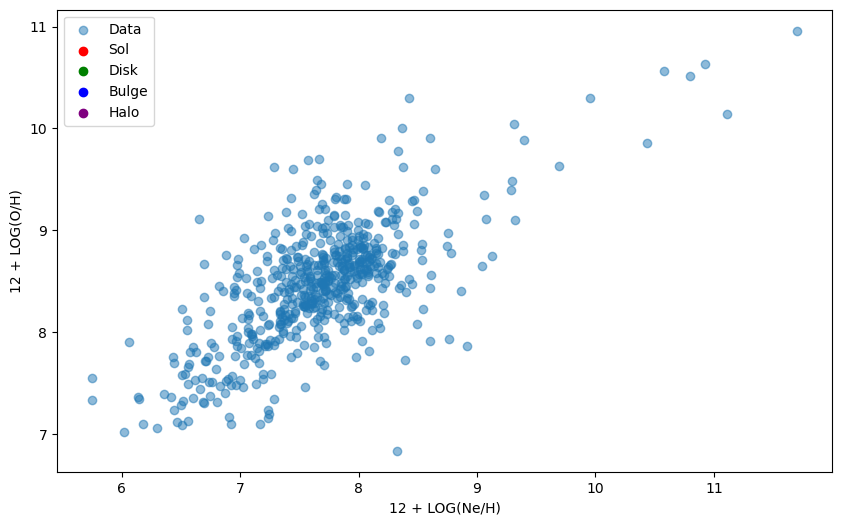

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_results.xlsx"
sayfa_adi = "neat_results"
veri = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# Hangi sütunlarda işlem yapacağınızı belirtin
y_sutunu = input("Y ekseninde kullanılacak sütun adını girin: ")
x_sutunu = input("X ekseninde kullanılacak sütun adını girin: ")

# İşlemi yapın ve yeni sütunları oluşturun
veri['X'] = 12 + np.log10(veri[x_sutunu])
veri['Y'] = 12 + np.log10(veri[y_sutunu])

# Ekstra değerler
sol = [-4.17]
disk = [-3.87]
bulge = [-3.80]
halo = [-4.15]

# 12 + log10 hesaplamaları
sol_log = 12 + np.log10(sol)
disk_log = 12 + np.log10(disk)
bulge_log = 12 + np.log10(bulge)
halo_log = 12 + np.log10(halo)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.scatter(veri['X'], veri['Y'], label='Data', alpha=0.5)

# Her grubu farklı renkte eklemek
plt.scatter(sol_log, sol_log, color='red', label='Sol', zorder=3)
plt.scatter(disk_log, disk_log, color='green', label='Disk', zorder=3)
plt.scatter(bulge_log, bulge_log, color='blue', label='Bulge', zorder=3)
plt.scatter(halo_log, halo_log, color='purple', label='Halo', zorder=3)

plt.xlabel('12 + LOG(' + x_sutunu + ')')
plt.ylabel('12 + LOG(' + y_sutunu + ')')
plt.legend()

# Grafiği kaydetme
kayit_klasoru = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/görüntüler/"
kayit_adi = "Makaledeneme.png"  # İstediğiniz dosya adı
kayit_yolu = os.path.join(kayit_klasoru, kayit_adi)
plt.savefig(kayit_yolu)

# Grafiği gösterme
plt.show()


Y ekseninde kullanılacak sütun adını girin: Ar/H
X ekseninde kullanılacak sütun adını girin: O/H


/Users/nurullah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nurullah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_57658/724907485.py:65: RuntimeWarning: invalid value encountered in log10
  sol_log = 12 + np.log10(sol)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_57658/724907485.py:66: RuntimeWarning: invalid value encountered in log10
  disk_log = 12 + np.log10(disk)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_57658/724907485.py:67: RuntimeWarning: invalid value encountered in log10
  bulge_log = 12 + np.log10(bulge)
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_57658/724907485.py:68: RuntimeWarning: invalid value encountere

Grafik başarıyla kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/görüntüler/ArH_OH.png


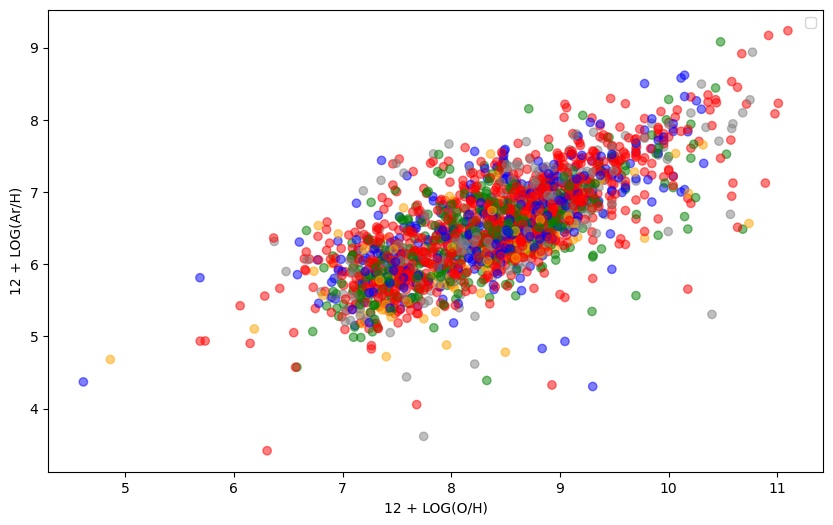

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
sayfa_adi = "neat_results"
veri = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# Renklendirilmiş veriyi oku
renklendirilmis_df = pd.read_excel(dosya_yolu, sheet_name='Sayfa11')

# Hangi sütunlarda işlem yapacağınızı belirtin
y_sutunu = input("Y ekseninde kullanılacak sütun adını girin: ")
x_sutunu = input("X ekseninde kullanılacak sütun adını girin: ")

# İşlemi yapın ve yeni sütunları oluşturun
veri['X'] = 12 + np.log10(veri[x_sutunu])
veri['Y'] = 12 + np.log10(veri[y_sutunu])

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    elif component == 'no distance':
        return 'gray'
    else:
        return 'black'

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo',
    'gray': 'No Distance',
    'black': 'Unknown'
}

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Veri noktalarını renklendir
colors = veri['idPNMain'].map(renk_dict)
plt.scatter(veri['X'], veri['Y'], c=colors, alpha=0.5)

# Ekstra değerler
sol = [-4.17]
disk = [-3.87]
bulge = [-3.80]
halo = [-4.15]

# 12 + log10 hesaplamaları
sol_log = 12 + np.log10(sol)
disk_log = 12 + np.log10(disk)
bulge_log = 12 + np.log10(bulge)
halo_log = 12 + np.log10(halo)

# Her grubu farklı renkte ve siyah kenarlıklı eklemek
plt.scatter(sol_log, sol_log, color='yellow', edgecolors='black', linewidths=1, zorder=3, s=100)
plt.scatter(disk_log, disk_log, color='red', edgecolors='black', linewidths=1,  zorder=3, s=100)
plt.scatter(bulge_log, bulge_log, color='blue', edgecolors='black', linewidths=1, zorder=3, s=100)
plt.scatter(halo_log, halo_log, color='orange', edgecolors='black', linewidths=1, zorder=3, s=100)

plt.xlabel(f'12 + LOG({x_sutunu})')
plt.ylabel(f'12 + LOG({y_sutunu})')
plt.legend()

# Grafiği kaydetme
kayit_klasoru = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/görüntüler/"
kayit_adi = "ArH_OH.png"  # İstediğiniz dosya adı
kayit_yolu = os.path.join(kayit_klasoru, kayit_adi)

# Ensure the directory exists
if not os.path.exists(kayit_klasoru):
    os.makedirs(kayit_klasoru)

plt.savefig(kayit_yolu)

# Output file path confirmation
if os.path.exists(kayit_yolu):
    print(f"Grafik başarıyla kaydedildi: {kayit_yolu}")
else:
    print("Grafik kaydedilemedi.")

# Grafiği gösterme
plt.show()


In [84]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Excel dosyasını yükle
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_kopyası.xlsx'
workbook = load_workbook(file_path)
sheet1 = workbook['Sayfa2']
sheet2 = workbook['Sayfa3']

# Sayfa11 ve Sayfa2'deki idPNMain sütunlarını pandas ile okuyun
df1 = pd.read_excel(file_path, sheet_name='Sayfa2', dtype={'Fits_Name': str, 'Gbileşen': str})
df2 = pd.read_excel(file_path, sheet_name='Sayfa3', dtype={'Fits_Name': str})

# Gbileşen sütununu ekleyin
if 'Gbileşen' not in df2.columns:
    df2['Gbileşen'] = ""

# Renkleri tanımlayın
color_mapping = {
    'Bulge': '0000FF',         # Mavi
    'Thin Disc': 'FF0000',     # Kırmızı
    'Thick Disk': '00FF00',    # Yeşil
    'Halo': 'FFA500',          # Turuncu
    'no distance': '808080'    # Gri
}

# Eşleşen değerlerin renklerini ve Gbileşen değerlerini kopyalayın
for idx, row in df2.iterrows():
    value = str(row['Fits_Name'])  # Değeri metin olarak alın
    if value in df1['Fits_Name'].values:
        match_row = df1[df1['Fits_Name'] == value].index[0]
        gbileşen_value = df1.at[match_row, 'Gbileşen']
        color = color_mapping.get(gbileşen_value)
        
        # Gbileşen değerini ekleyin
        sheet2.cell(row=idx + 2, column=len(df2.columns) + 1).value = gbileşen_value
        
        if color:
            fill = PatternFill(start_color=color, end_color=color, fill_type='solid')
            # İlgili satırdaki tüm hücreleri renklendirin
            for col in range(1, sheet2.max_column + 1):
                cell = sheet2.cell(row=idx + 2, column=col)
                cell.fill = fill

# Dosyayı kaydedin
workbook.save(file_path)

In [70]:
import pandas as pd

# Excel dosyasının yolunu belirtin
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_kopyası.xlsx'

# Sayfa2 ve Sayfa3'ü okuyun
sayfa2 = pd.read_excel(file_path, sheet_name='Sayfa2')
sayfa3 = pd.read_excel(file_path, sheet_name='Sayfa3')

# İki sayfanın Fits_Name sütunlarını ayrı DataFrame'lere kopyalayın
df = pd.DataFrame({
    'Gbileşen': sayfa2['Gbileşen'],
    'Sayfa2_Fits_Name': sayfa2['Fits_Name'],
    'Sayfa3_Fits_Name': sayfa3['Fits_Name']
})

# DataFrame'i metin dosyasına kaydedin
output_file = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/ortak_fits_names.txt'
df.to_csv(output_file, sep='\t', index=False)

print(f"Ortak Fits_Name değerleri metin dosyasına kaydedildi: {output_file}")


Ortak Fits_Name değerleri metin dosyasına kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/ortak_fits_names.txt


In [73]:
import pandas as pd

# Excel dosyasının yolunu belirtin
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_kopyası.xlsx'

# Sayfa2 ve Sayfa3'ü okuyun
sayfa2 = pd.read_excel(file_path, sheet_name='Sayfa2')
sayfa3 = pd.read_excel(file_path, sheet_name='Sayfa3')

# Fits_Name sütunundaki her bir değerin sonundaki boşlukları kaldırın (Sayfa2 için)
sayfa2['Fits_Name'] = sayfa2['Fits_Name'].str.rstrip()

# Sayfa2 ve Sayfa3'ü Fits_Name sütunu üzerinden birleştirin
merged_df = pd.merge(sayfa2, sayfa3, on='Fits_Name', how='inner', suffixes=('_Sayfa2', '_Sayfa3'))

# Gbileşen değerlerine göre renk atamalarını tanımlayın
color_mapping = {
    'Bulge': 'blue',
    'Thin Disc': 'red',
    'Thick Disk': 'green',
    'Halo': 'orange',
    'no distance': 'grey'
}

# Gbileşen sütunundaki değerlere göre renkleri uygulayın
merged_df['Color_Sayfa3'] = merged_df['Gbileşen'].map(color_mapping)

# Sonuçları ekrana yazdırın
print("Eşleştirilmiş ve renklendirilmiş DataFrame:")
print(merged_df)

# Sonuçları Excel'e kaydedin (isteğe bağlı)
output_file = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/renklendirilmis_veriler.xlsx'
merged_df.to_excel(output_file, index=False)
print(f"Renklendirilmiş veriler Excel dosyasına kaydedildi: {output_file}")

Eşleştirilmiş ve renklendirilmiş DataFrame:
      idPNMain                                          Fits_Name  \
0            9      AAOmega_bulge_JaSt93_BLUEx_2dF290508_id9.fits   
1            9  AAOmega_bulge_PNG000.1-01.9_BLUEx_2dF160308_id...   
2           11      AAOmega_bulge_M3-43_BLUEx_2dF290508_id11.fits   
3           12       AAOmega_bulge_Al2-J_BLUE_2dF300508_id12.fits   
4           15     AAOmega_bulge_JaSt69_BLUEx_2dF290508_id15.fits   
...        ...                                                ...   
2491     23363                     FRA_Kn80_HP020819_id23363.fits   
2492     23470                SAAO2017_Pa67_SA240517_id23470.fits   
2493     23936                SAAO2017_FBP6_SA280517_id23936.fits   
2494     31874       SAAO201308_SP1757-3103_SA180813_id31874.fits   
2495     33483                  FRA_StDr141_VO060122_id33483.fits   

         Gbileşen  LOG(S2H)  LOG(N2H)  LOG(O3H2)  LOG(HS2)  LOG(HN2)  Ticket2  \
0           Bulge       NaN       NaN        N

In [80]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Excel dosyasını yükle
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_kopyası_renkli.xlsx'
workbook = load_workbook(file_path)
sheet2 = workbook['Sayfa3']

# Sayfa2 ve Sayfa3'ü pandas ile oku
df2 = pd.read_excel(file_path, sheet_name='Sayfa3', dtype={'Fits_Name': str})

# Fits_Name sütunundaki her bir değerin sonundaki boşlukları kaldır
df2['Fits_Name'] = df2['Fits_Name'].str.rstrip()

# Gbileşen sütununu ekleyin
if 'Gbileşen' not in df2.columns:
    df2['Gbileşen'] = ""

# Renkleri tanımlayın
color_mapping = {
    'Bulge': '0000FF',         # Mavi
    'Thin Disc': 'FF0000',     # Kırmızı
    'Thick Disk': '00FF00',    # Yeşil
    'Halo': 'FFA500',          # Turuncu
    'no distance': '808080'    # Gri
}

# Eşleşen değerlerin renklerini ve Gbileşen değerlerini kopyalayın
for idx, row in df2.iterrows():
    value = str(row['Fits_Name'])  # Değeri metin olarak alın
    match_row = None
    
    # Fits_Name sütunundaki her bir değerin sonundaki boşlukları kaldırın ve eşleştirin
    for index, row2 in df1.iterrows():
        if str(value).rstrip() == str(row2['Fits_Name']):
            match_row = index
            break
    
    # Eğer eşleşme varsa işlem yapın
    if match_row is not None:
        gbileşen_value = df1.at[match_row, 'Gbileşen']
        color = color_mapping.get(gbileşen_value)
        
        # Gbileşen değerini ekleyin
        sheet2.cell(row=idx + 2, column=len(df2.columns) + 1).value = gbileşen_value
        
        if color:
            fill = PatternFill(start_color=color, end_color=color, fill_type='solid')
            # İlgili satırdaki tüm hücreleri renklendirin
            for col in range(1, sheet2.max_column + 1):
                cell = sheet2.cell(row=idx + 2, column=col)
                cell.fill = fill

# Dosyayı kaydedin
workbook.save(file_path)

print(f"Renklendirme işlemi başarıyla tamamlandı: {file_path}")

Renklendirme işlemi başarıyla tamamlandı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_kopyası_renkli.xlsx


In [85]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Excel dosyasını oku
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_kopyası.xlsx'
xls = pd.ExcelFile(file_path)

# Sayfa2 ve Sayfa3 verilerini al
sayfa2_df = pd.read_excel(xls, 'Sayfa2')
sayfa3_df = pd.read_excel(xls, 'Sayfa3')

# Sayfa2'deki Fits_Name sütunundaki verilerin sonundaki boşlukları kaldır
sayfa2_df['Fits_Name'] = sayfa2_df['Fits_Name'].str.strip()

# Verileri Fits_Name sütunu üzerinden birleştir
merged_df = pd.merge(sayfa3_df, sayfa2_df[['Fits_Name', 'Gbileşen']], how='left', on='Fits_Name')

# Renklendirme için bir fonksiyon tanımla
def get_fill_color(gbileşen):
    color_dict = {
        'Bulge': '0000FF',        # Mavi
        'Thin Disc': 'FF0000',    # Kırmızı
        'Thick Disk': '008000',   # Yeşil
        'Halo': 'FFA500',         # Turuncu
        'no distance': '808080'   # Gri
    }
    return PatternFill(start_color=color_dict.get(gbileşen, 'FFFFFF'), end_color=color_dict.get(gbileşen, 'FFFFFF'), fill_type="solid")

# Renklendirme işlemini uygula
wb = load_workbook(file_path)
ws = wb['Sayfa3']

for index, row in merged_df.iterrows():
    fill = get_fill_color(row['Gbileşen'])
    for cell in ws[index+2]:  # Excel'de indeksler 1'den başlar ve başlık satırını atlamalıyız
        cell.fill = fill

# Sonuçları yeni bir dosyaya kaydet
output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_renkli.xlsx'
wb.save(output_file_path)

print(f"Renklendirilmiş dosya '{output_file_path}' konumuna kaydedildi.")

Renklendirilmiş dosya '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_renkli.xlsx' konumuna kaydedildi.


In [86]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Excel dosyasını oku
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_kopyası.xlsx'
xls = pd.ExcelFile(file_path)

# Sayfa2 ve Sayfa3 verilerini al
sayfa2_df = pd.read_excel(xls, 'Sayfa2')
sayfa3_df = pd.read_excel(xls, 'Sayfa3')

# Sayfa2'deki Fits_Name sütunundaki verilerin sonundaki boşlukları kaldır
sayfa2_df['Fits_Name'] = sayfa2_df['Fits_Name'].str.strip()

# Verileri Fits_Name sütunu üzerinden birleştir
merged_df = pd.merge(sayfa3_df, sayfa2_df[['Fits_Name', 'Gbileşen']], how='left', on='Fits_Name')

# Renklendirme için bir fonksiyon tanımla
def get_fill_color(gbileşen):
    color_dict = {
        'Bulge': '0000FF',        # Mavi
        'Thin Disc': 'FF0000',    # Kırmızı
        'Thick Disk': '008000',   # Yeşil
        'Halo': 'FFA500',         # Turuncu
        'no distance': '808080'   # Gri
    }
    return PatternFill(start_color=color_dict.get(gbileşen, 'FFFFFF'), end_color=color_dict.get(gbileşen, 'FFFFFF'), fill_type="solid")

# Renklendirme işlemini uygula ve Gbileşen sütununa veri ekle
wb = load_workbook(file_path)
ws = wb['Sayfa3']

# 'Gbileşen' sütunu var mı kontrol et, yoksa ekle
if 'Gbileşen' not in [cell.value for cell in ws[1]]:
    ws.cell(row=1, column=ws.max_column + 1).value = 'Gbileşen'

# Gbileşen sütununun indeksini al
gbileşen_column_index = [cell.value for cell in ws[1]].index('Gbileşen') + 1

for index, row in merged_df.iterrows():
    fill = get_fill_color(row['Gbileşen'])
    ws.cell(row=index+2, column=gbileşen_column_index).value = row['Gbileşen']  # Gbileşen verisini ekle
    for cell in ws[index+2]:  # Excel'de indeksler 1'den başlar ve başlık satırını atlamalıyız
        cell.fill = fill

# Sonuçları yeni bir dosyaya kaydet
output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_renkli.xlsx'
wb.save(output_file_path)

print(f"Renklendirilmiş dosya '{output_file_path}' konumuna kaydedildi.")

Renklendirilmiş dosya '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output_renkli.xlsx' konumuna kaydedildi.


In [89]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Excel dosyasını oku
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/Sigma_5.xlsx'
xls = pd.ExcelFile(file_path)

# Sayfa2 ve Sayfa3 verilerini al
sayfa2_df = pd.read_excel(xls, 'Sayfa1')
sayfa3_df = pd.read_excel(xls, 'smb_bpt')

# Sayfa2'deki Fits_Name sütunundaki verilerin sonundaki boşlukları kaldır
sayfa2_df['Fits_Name'] = sayfa2_df['Fits_Name'].str.strip()

# Verileri Fits_Name sütunu üzerinden birleştir
merged_df = pd.merge(sayfa3_df, sayfa2_df[['Fits_Name', 'Gbileşen']], how='left', on='Fits_Name')

# Renklendirme için bir fonksiyon tanımla
def get_fill_color(gbileşen):
    color_dict = {
        'Bulge': '0000FF',        # Mavi
        'Thin Disc': 'FF0000',    # Kırmızı
        'Thick Disk': '008000',   # Yeşil
        'Halo': 'FFA500',         # Turuncu
        'no distance': '808080',  # Gri
        'no data': '000000'       # Siyah
    }
    return PatternFill(start_color=color_dict.get(gbileşen, 'FFFFFF'), end_color=color_dict.get(gbileşen, 'FFFFFF'), fill_type="solid")

# Renklendirme işlemini uygula ve Gbileşen sütununa veri ekle
wb = load_workbook(file_path)
ws = wb['smb_bpt']

# 'Gbileşen' sütunu var mı kontrol et, yoksa ekle
if 'Gbileşen' not in [cell.value for cell in ws[1]]:
    ws.cell(row=1, column=ws.max_column + 1).value = 'Gbileşen'

# Gbileşen sütununun indeksini al
gbileşen_column_index = [cell.value for cell in ws[1]].index('Gbileşen') + 1

for index, row in merged_df.iterrows():
    if pd.isna(row['Gbileşen']):
        gbileşen_value = 'no data'
    else:
        gbileşen_value = row['Gbileşen']
    
    fill = get_fill_color(gbileşen_value)
    
    ws.cell(row=index+2, column=gbileşen_column_index).value = gbileşen_value  # Gbileşen verisini ekle
    for cell in ws[index+2]:  # Excel'de indeksler 1'den başlar ve başlık satırını atlamalıyız
        cell.fill = fill

# Sonuçları yeni bir dosyaya kaydet
output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/Sigma_5_renkli.xlsx'
wb.save(output_file_path)

print(f"Renklendirilmiş dosya '{output_file_path}' konumuna kaydedildi.")

Renklendirilmiş dosya '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/Sigma_5_renkli.xlsx' konumuna kaydedildi.


In [94]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Excel dosyasını oku
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/Sigma_5.xlsx'
xls = pd.ExcelFile(file_path)

# Sayfa2 ve Sayfa3 verilerini al
sayfa2_df = pd.read_excel(xls, 'Sayfa1')
sayfa3_df = pd.read_excel(xls, 'Sayfa2')

# Sayfa2'deki Fits_Name sütunundaki verilerin sonundaki boşlukları kaldır
sayfa2_df['Fits_Name'] = sayfa2_df['Fits_Name'].str.strip()

# Verileri Fits_Name sütunu üzerinden birleştir
merged_df = pd.merge(sayfa3_df, sayfa2_df[['Fits_Name', 'Gbileşen']], how='left', on='Fits_Name')

# Renklendirme için bir fonksiyon tanımla
def get_fill_color(gbileşen):
    color_dict = {
        'Bulge': '0000FF',        # Mavi
        'Thin Disc': 'FF0000',    # Kırmızı
        'Thick Disk': '008000',   # Yeşil
        'Halo': 'FFA500',         # Turuncu
        'no distance': '808080',  # Gri
        'no data': '000000'       # Siyah
    }
    return PatternFill(start_color=color_dict.get(gbileşen, 'FFFFFF'), end_color=color_dict.get(gbileşen, 'FFFFFF'), fill_type="solid")

# Renklendirme işlemini uygula ve Gbileşen sütununa veri ekle
wb = load_workbook(file_path)
ws = wb['Sayfa2']

# 'Gbileşen' sütunu var mı kontrol et, yoksa ekle
if 'Gbileşen' not in [cell.value for cell in ws[1]]:
    ws.cell(row=1, column=ws.max_column + 1).value = 'Gbileşen'

# Gbileşen sütununun indeksini al
gbileşen_column_index = [cell.value for cell in ws[1]].index('Gbileşen') + 1

for index, row in merged_df.iterrows():
    if pd.isna(row['Gbileşen']):
        gbileşen_value = 'no data'
    else:
        gbileşen_value = row['Gbileşen']
    
    fill = get_fill_color(gbileşen_value)
    
    ws.cell(row=index+2, column=gbileşen_column_index).value = gbileşen_value  # Gbileşen verisini ekle
    for cell in ws[index+2]:  # Excel'de indeksler 1'den başlar ve başlık satırını atlamalıyız
        cell.fill = fill

# Sonuçları yeni bir dosyaya kaydet
output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/total_abun.xlsx'
wb.save(output_file_path)

print(f"Renklendirilmiş dosya '{output_file_path}' konumuna kaydedildi.")

Renklendirilmiş dosya '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/total_abun.xlsx' konumuna kaydedildi.


In [117]:
import numpy as np

# Verilen hata değerleri
errors = np.array([0.25,
0.19,
0.31,
0.73])

# Hata karelerinin karekökünü alarak ortalama hesaplama
mean_squared_error = np.sqrt(np.mean(errors**2))
mean_squared_error

0.4264973622427224